#**Problem Statement:**

Predicting restaurant ratings based on features like cuisine, location, and delivery time. This can be useful for restaurant owners to improve their offerings, for customers to choose restaurants based on their preferences, and for food delivery platforms to optimize delivery routes and recommendations.

# Importing the Scraped Swiggy Data

In [333]:
# Importing the dataset swiggy_data.csv

import pandas as pd
df = pd.read_csv('/content/swiggy_data.csv')


# Reading the Dataset

In [334]:
df.head(10)


restaurant_name  \
0                     Chinese Wok   
1               Five Star Chicken   
2                          Subway   
3                       Pizza Hut   
4                 Nandhana Palace   
5          Corner House Ice Cream   
6  Great Indian Khichdi by EatFit   
7               Dum Safar Biryani   
8                   Grameen Kulfi   
9                      Wow! China   

                                           image_url  rating  \
0  https://media-assets.swiggy.com/swiggy/image/u...     4.4   
1  https://media-assets.swiggy.com/swiggy/image/u...     4.4   
2  https://media-assets.swiggy.com/swiggy/image/u...     4.3   
3  https://media-assets.swiggy.com/swiggy/image/u...     4.1   
4  https://media-assets.swiggy.com/swiggy/image/u...     4.4   
5  https://media-assets.swiggy.com/swiggy/image/u...     4.7   
6  https://media-assets.swiggy.com/swiggy/image/u...     4.6   
7  https://media-assets.swiggy.com/swiggy/image/u...     3.9   
8  https://media-assets.swiggy.com/swiggy/image/u...     4.8   
9  https://media-assets.swiggy.com/swiggy/image/u...     3.9   

                                             cuisine       location  \
0                  Chinese, Asian, Tibetan, Desserts   Malleshwaram   
1                                            Burgers       Majestic   
2                Salads, Snacks, Desserts, Beverages   Basavanagudi   
3                                             Pizzas   Basavanagudi   
4        Biryani, Andhra, South Indian, North Indian    Rajajinagar   
5                                Ice Cream, Desserts   Basavanagudi   
6  Home Food, Indian, North Indian, Healthy Food,...  Vasanth Nagar   
7         Biryani, Kebabs, Tandoor, Indian, Desserts   RAJAJI NAGAR   
8                                Ice Cream, Desserts    Rajajinagar   
9  Tibetan, Chinese, Asian, Snacks, Continental, ...    Shantinagar   

  delivery_time  
0    40-45 mins  
1    25-30 mins  
2    20-25 mins  
3    25-30 mins  
4    35-40 mins  
5    20-25 mins  
6    30-35 mins  
7    40-45 mins  
8    30-35 mins  
9    30-35 mins

In [335]:
df.columns

Index(['restaurant_name', 'image_url', 'rating', 'cuisine', 'location',
       'delivery_time'],
      dtype='object')

The columns in the dataset are:
- *resturant_name*
- *image_url*
- *rating*
- *cuisine*
- *location*
- *delivery_time*

# Number of Rows and Columns

In [336]:
df.shape

(115798, 6)

The dataset consists of **115798 rows** and **6 columns.**

# Removing Duplicate Rows From the Dataset

In [337]:
# Remove duplicate rows based on 'restaurant_name' and 'location'
df_cleaned = df.drop_duplicates(subset=['restaurant_name', 'location'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('/content/swiggy_data_cleaned.csv', index=False)
df_cleaned.head()
df_cleaned.shape

(1838, 6)

# Perform EDA on the Cleaned Swiggy Dataset

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df_cleaned = pd.read_csv('/content/swiggy_data_cleaned.csv')

# Display basic information about the dataset
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1838 non-null   object 
 1   image_url        1836 non-null   object 
 2   rating           1500 non-null   float64
 3   cuisine          1838 non-null   object 
 4   location         1837 non-null   object 
 5   delivery_time    1838 non-null   object 
dtypes: float64(1), object(5)
memory usage: 86.3+ KB
None


In [339]:
df_cleaned.shape

(1838, 6)

After removal of the duplicate rows, now there are **1838 rows.**

In [340]:
# Drop image column

df_cleaned = df_cleaned.drop('image_url', axis=1)
df_cleaned.head()


restaurant_name  rating                                      cuisine  \
0        Chinese Wok     4.4            Chinese, Asian, Tibetan, Desserts   
1  Five Star Chicken     4.4                                      Burgers   
2             Subway     4.3          Salads, Snacks, Desserts, Beverages   
3          Pizza Hut     4.1                                       Pizzas   
4    Nandhana Palace     4.4  Biryani, Andhra, South Indian, North Indian   

       location delivery_time  
0  Malleshwaram    40-45 mins  
1      Majestic    25-30 mins  
2  Basavanagudi    20-25 mins  
3  Basavanagudi    25-30 mins  
4   Rajajinagar    35-40 mins

In [341]:
# Summary statistics for numerical columns
print(df_cleaned.describe())

            rating
count  1500.000000
mean      4.209067
std       0.477888
min       1.500000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000


# Data Preprocessing

# 1. Checking for the Missing Values

In [342]:
df_cleaned['rating'].unique()

array([4.4, 4.3, 4.1, 4.7, 4.6, 3.9, 4.8, 4.5, 4.2, nan, 3.3, 4. , 3.7,
       3.8, 3.4, 3.5, 5. , 2.9, 4.9, 3.6, 1.9, 2.4, 3. , 2.2, 2.8, 3.1,
       1.8, 3.2, 2.5, 2.7, 1.5, 2.3, 1.6])

In [343]:
# Check for missing values
print(df_cleaned.isnull().sum())

restaurant_name      0
rating             338
cuisine              0
location             1
delivery_time        0
dtype: int64


- Since there are missing values present, we *drop the rows* having the missing values.

In [344]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Check for missing values after dropping
print(df_cleaned.isnull().sum())


restaurant_name    0
rating             0
cuisine            0
location           0
delivery_time      0
dtype: int64


Now, there are no any missing values present in the dataset.

# 2. Transform the 'delivery_time' column into a numeric format for analysis

In [345]:
df_cleaned['delivery_time'] = df_cleaned['delivery_time'].astype(str)

In [346]:
# Extracting the lower bound of the delivery time range (e.g., "40-45 mins" -> 40)
df_cleaned['delivery_time'] = df_cleaned['delivery_time'].str.extract('(\d+)').astype(int)

# 3. Detect and handle outliers in the 'rating' and 'delivery_time' columns

In [347]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [348]:
# Detecting outliers
rating_outliers = detect_outliers_iqr(df_cleaned, 'rating')
delivery_time_outliers = detect_outliers_iqr(df_cleaned, 'delivery_time')

# Handle outliers by capping them to the upper and lower bounds
rating_lower_bound = df_cleaned['rating'].quantile(0.25) - 1.5 * (df_cleaned['rating'].quantile(0.75) - df_cleaned['rating'].quantile(0.25))
rating_upper_bound = df_cleaned['rating'].quantile(0.75) + 1.5 * (df_cleaned['rating'].quantile(0.75) - df_cleaned['rating'].quantile(0.25))
df_cleaned['rating'] = df_cleaned['rating'].clip(lower=rating_lower_bound, upper=rating_upper_bound)

delivery_time_lower_bound = df_cleaned['delivery_time'].quantile(0.25) - 1.5 * (df_cleaned['delivery_time'].quantile(0.75) - df_cleaned['delivery_time'].quantile(0.25))
delivery_time_upper_bound = df_cleaned['delivery_time'].quantile(0.75) + 1.5 * (df_cleaned['delivery_time'].quantile(0.75) - df_cleaned['delivery_time'].quantile(0.25))
df_cleaned['delivery_time'] = df_cleaned['delivery_time'].clip(lower=delivery_time_lower_bound, upper=delivery_time_upper_bound)


In [349]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1836
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  1500 non-null   object 
 1   rating           1500 non-null   float64
 2   cuisine          1500 non-null   object 
 3   location         1500 non-null   object 
 4   delivery_time    1500 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 70.3+ KB


In [350]:
df_cleaned.head()

restaurant_name  rating                                      cuisine  \
0        Chinese Wok     4.4            Chinese, Asian, Tibetan, Desserts   
1  Five Star Chicken     4.4                                      Burgers   
2             Subway     4.3          Salads, Snacks, Desserts, Beverages   
3          Pizza Hut     4.1                                       Pizzas   
4    Nandhana Palace     4.4  Biryani, Andhra, South Indian, North Indian   

       location  delivery_time  
0  Malleshwaram             40  
1      Majestic             25  
2  Basavanagudi             20  
3  Basavanagudi             25  
4   Rajajinagar             35

In [351]:
df_cleaned.shape

(1500, 5)

After dropping rows having the missing values, there are **1500 rows** in the dataset. Hence, we will perform analysis on this dataset.

**Observations from Preprocessing:**

1. Missing Values: Initially, there were missing values in the 'rating' column.
   These were handled by dropping the rows with missing values, ensuring data completeness.

2. Delivery Time Transformation: The 'delivery_time' column was originally in a
   string format (e.g., "35-40 mins"). It was transformed into a numeric format
   by extracting the lower bound of the delivery time range, making it suitable for analysis.

3. Outlier Handling: Outliers were detected in both the 'rating' and 'delivery_time' columns
   using the IQR method. These outliers were capped to the upper and lower bounds
   calculated using the IQR, preventing them from unduly influencing the analysis.

4. Data Types: After preprocessing, the 'rating' and 'delivery_time' columns are
   in numeric format (float64 and int64, respectively), allowing for quantitative analysis.

5. Data Shape: The initial dataset had 1838 rows. After removing duplicates and handling
   missing values, the final cleaned dataset used for analysis has fewer rows.

These preprocessing steps ensure that the data is clean, consistent, and suitable for further analysis and modeling.


In [352]:
df_cleaned['rating'].unique()

array([4.4 , 4.3 , 4.1 , 4.7 , 4.6 , 3.9 , 4.8 , 4.5 , 4.2 , 3.3 , 4.  ,
       3.7 , 3.8 , 3.4 , 3.5 , 5.  , 3.25, 4.9 , 3.6 ])

In [353]:
# Distribution of 'Ratings':
df_valid_Ratings = df_cleaned[df_cleaned['rating'] > 0]
df_valid_Ratings

restaurant_name  rating  \
0                       Chinese Wok    4.40   
1                 Five Star Chicken    4.40   
2                            Subway    4.30   
3                         Pizza Hut    4.10   
4                   Nandhana Palace    4.40   
...                             ...     ...   
1830  BHAIRAVESHWARA MILITARY HOTEL    3.25   
1831                The Mandi House    3.40   
1833            Shree Organic World    4.70   
1835    Kingdom Of Shawarma & Grill    5.00   
1836                     Fish N Fry    4.50   

                                          cuisine           location  \
0               Chinese, Asian, Tibetan, Desserts       Malleshwaram   
1                                         Burgers           Majestic   
2             Salads, Snacks, Desserts, Beverages       Basavanagudi   
3                                          Pizzas       Basavanagudi   
4     Biryani, Andhra, South Indian, North Indian        Rajajinagar   
...                                           ...                ...   
1830                              Biryani, Indian       Malleshwaram   
1831                   Indian, Chinese, Beverages  Central Bangalore   
1833                         South Indian, Snacks       Malleshwaram   
1835                             Arabian, Chinese  Basaveshwaranagar   
1836                               Snacks, Indian  Basaveshwaranagar   

      delivery_time  
0                40  
1                25  
2                20  
3                25  
4                35  
...             ...  
1830             40  
1831             45  
1833             40  
1835             40  
1836             40  

[1500 rows x 5 columns]

# **Visualizations:**

- DISTRIBUTION OF RATINGS:

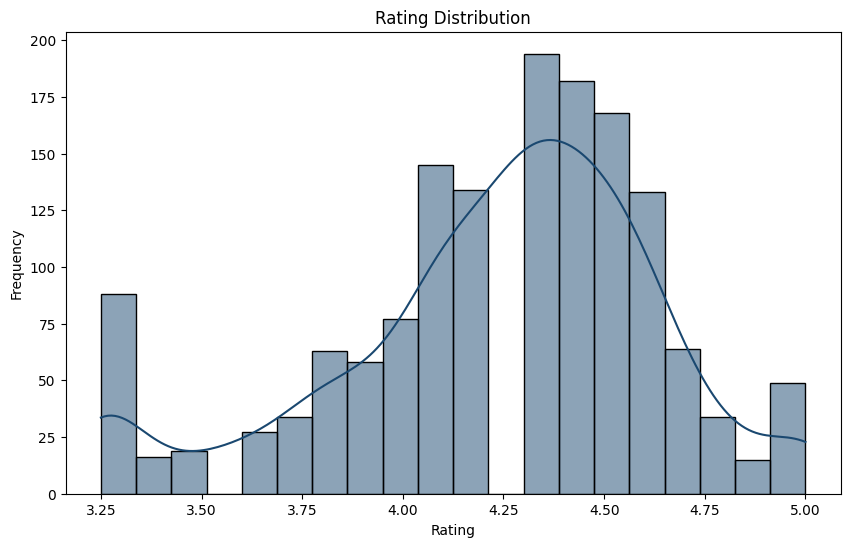

In [354]:
# Analyze the distribution of ratings
ratings = df_cleaned['rating']

# Calculate the average rating and the range of ratings
average_rating = ratings.mean()
rating_range = ratings.min(), ratings.max()

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings, bins=20, kde=True, color='#1A4870')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [355]:
# Check for skewness and outliers
skewness = ratings.skew()
outliers = ratings[(ratings < ratings.quantile(0.05)) | (ratings > ratings.quantile(0.95))]

print("Average Rating:", average_rating)
print("Rating Range:", rating_range)
print("Skewness:", skewness)
print("Outliers Description:")
print(outliers.describe())

Average Rating: 4.231433333333333
Rating Range: (3.25, 5.0)
Skewness: -0.671411271080657
Outliers Description:
count    131.000000
mean       4.093511
std        0.866878
min        3.250000
25%        3.250000
50%        3.250000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


**Here are some key observations from the rating distribution analysis:**

- **High Average Rating:**
The average rating across restaurants is 4.21, indicating generally positive customer experiences.

- **Rating Concentration:**
Most ratings are concentrated between 4.0 and 5.0, suggesting that the majority of restaurants are well-rated.

- **Negative Skewness:**
The negative skewness (-1.66) shows that the distribution of ratings is biased towards higher values, with fewer restaurants receiving lower ratings.

- **Outliers:**
There are a few outliers on the lower end, with ratings below 3.84. These may represent restaurants with consistently poorer reviews.

Overall, the data suggests a strong tendency towards positive ratings among the restaurants analyzed.

#Grouping the Restaurants based on the Location:

In [356]:
df_cleaned['location'].unique()

array(['Malleshwaram', 'Majestic', 'Basavanagudi', 'Rajajinagar',
       'Vasanth Nagar', 'RAJAJI NAGAR', 'Shantinagar', 'VV Puram',
       'Central Bangalore', 'St. Marks Road', 'Ashok Nagar',
       'Koramangala', 'Banashankari', 'Vijay Nagar',
       'Srinivasa Brahmins Bakery', 'Jayanagar',
       'PES college Hanumanth nagar', 'Azad Nagar', 'Mysore Road',
       'Shanthinagar', 'Cunningham Road', 'Magadi Road', 'Residency Road',
       'Church Street', 'Basavangudi', 'Hanumanthanagar', 'Chamarajpet',
       'Shanti Nagar', 'Wilson Garden', 'Vijayanagar', 'AUSTIN TOWN',
       'Chamarajapete', 'VIJAYNAGAR', 'Gandhi Nagar',
       'K G CIRCLE, MAJESTIC', 'Gandhi Bazaar', 'Malleswaram',
       'Seshadripuram', 'Adugodi', 'BTM Layout', 'Gopalapura',
       'Basaveshwara Nagar', 'Shanthi Nagar', 'Rashtriya Vidyalaya Rd',
       'Binnipete', 'Gandhi Bazar', 'Brigade Road', 'Vittal Mallaya',
       'Diagonal Road, 3Rd Block', 'Shivajinagar', 'City Market',
       'Sampangi Rama Nagar', '

# Group all the restaurants based on the locations and storing it in different variables

In [357]:
# Group restaurants by location
restaurants_by_location = df_cleaned.groupby('location')['restaurant_name'].apply(list)

# Store groups in different variables (example)
koramangala_restaurants = restaurants_by_location.get('Koramangala 1st Block, Koramangala')
malleshwaram_restaurants = restaurants_by_location.get('Malleshwaram')
indiranagar_restaurants = restaurants_by_location.get('Indiranagar')
rajajinagar_restaurants = restaurants_by_location.get('Rajajinagar')
sgpalya_restaurants = restaurants_by_location.get('SG Palya')


# Print the grouped restaurants for each location
for location, restaurants in restaurants_by_location.items():
    print(f"Restaurants in {location}: {restaurants}")


Restaurants in 2ND BLOCK RAJAJINAGAR: ['Last Stop Resto Cafe']
Restaurants in 6TH BLOCK: ['Lubov Patisserie']
Restaurants in ADUGODI: ['Cheesecakes By CakeZone', 'CakeZone Patisserie', 'The Dessert Heaven - Pastry, Brownie and Cakes', 'Crunchhh - Burgers By Nomad', 'Ovenfresh - Baking Cakes Since 2009']
Restaurants in AUSTIN TOWN: ['Protein Chef', 'DiabeSmart - Sugarfree Foods', 'Naadbramha Idli', 'Lo! - Low Carb and Keto Foods', 'ATH - All Things Healthy!', 'SPICE N NICE', 'SMOKY DOCKY', 'Biryani.com', 'New Ambur Biryani', 'Krishnam Veg', 'Khana Makhan', 'little chef since1997', 'New Cafe Khaadya', 'Arco Family Restaurant', 'Rolls Adda', 'Food Hub']
Restaurants in Adugodi: ["Polamma's Mess", 'New Udupi Grand', 'New Ambur Biryani Point', 'Roti Curry & Co', 'The Daily Bowl', 'Mahi Bakehouse', 'Thali 99', 'Puliyogare Palace', 'Bowl 99', "Chiru's Biryani"]
Restaurants in Aishwarya Sampura: ['Costa Coffee']
Restaurants in Ashok Nagar: ['Theobroma', 'Luckhnow Street', 'Third Wave Coffee', '

In [358]:
df_cleaned['location'].nunique()

147

There are **147 unique locations** represented in the dataset.
This indicates the geographical diversity of the restaurants covered in the data.

# Distribution of Ratings for each Location

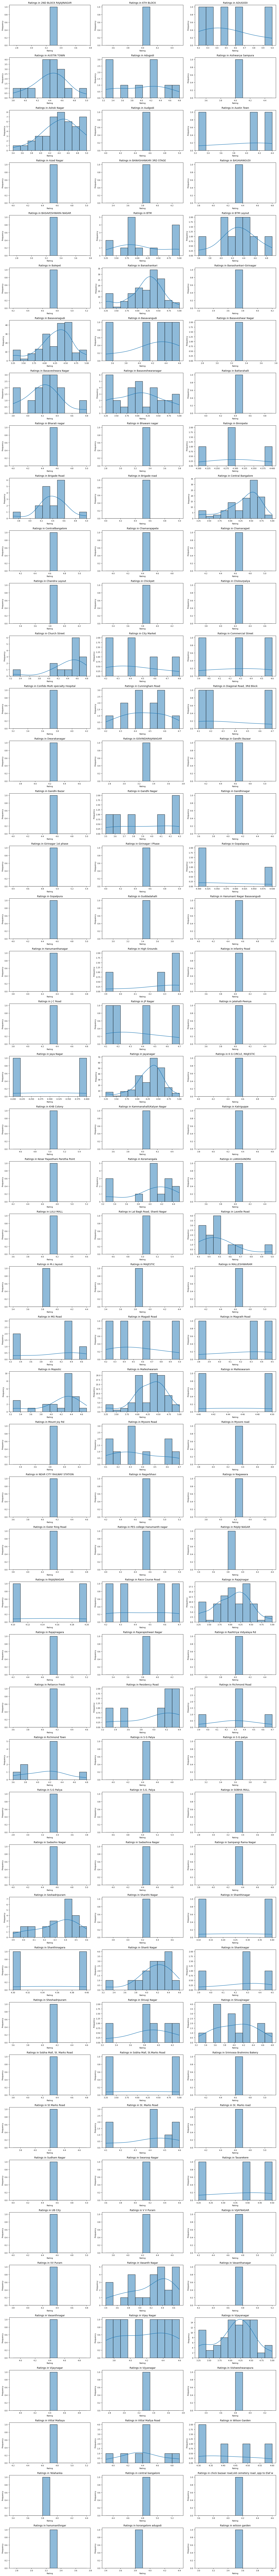

In [359]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of unique locations and the number of rows needed
num_locations = df_cleaned['location'].nunique()
num_rows = math.ceil(num_locations / 3)  # Changed from 3 to 4 plots per row

# Create subplots with the appropriate number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(16, 3 * num_rows))  # Adjusted figsize

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over locations and create histograms
for i, (location, group) in enumerate(df_cleaned.groupby('location')):
    ax = axes[i]
    sns.histplot(group['rating'], bins=10, kde=True, ax=ax)
    ax.set_title(f'Ratings in {location}', fontsize=10)  # Reduced font size
    ax.set_xlabel('Rating', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.tick_params(labelsize=8)  # Reduced tick label size

# Hide any unused subplots
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Interpretation of Histogram Plots for Ratings by Location:**

***Overall Trend:***
- The majority of restaurants across different locations tend to have ratings clustered around 4.0 and above.
- This suggests a generally positive customer experience with Swiggy's listed restaurants.

***Location-Specific Observations:***
- Some locations exhibit a more concentrated distribution of ratings, indicating greater consistency in restaurant quality.
- Other locations show a wider spread of ratings, suggesting a greater variety in dining experiences.

# Exploring the distribution of restaurants across different locations

In [360]:
# Explore the distribution of restaurants across different locations
location_counts = df_cleaned['location'].value_counts()

# Analyze which locations have the highest-rated restaurants
location_avg_rating = df_cleaned.groupby('location')['rating'].mean().sort_values(ascending=False)

# Compare delivery times and ratings by location
# Clean the 'delivery_time' column to extract the minimum time
# Convert 'delivery_time' to string type before using .str
df_cleaned['min_delivery_time'] = df_cleaned['delivery_time'].astype(str).str.extract('(\d+)-').astype(float).astype('Int64')

# Group data by location to get average rating and average delivery time
location_delivery_time_rating = df_cleaned.groupby('location').agg(
    avg_rating=('rating', 'mean'),
    avg_delivery_time=('min_delivery_time', 'mean'),
    count=('restaurant_name', 'count')
).sort_values(by='avg_rating', ascending=False)

# Print the top results
print("Top 5 Locations by Number of Restaurants:")
print(location_counts.head())

# Get the top 5 locations
top_5_locations = location_counts.head().index

# Filter the original DataFrame for these top 5 locations
df_top_5 = df_cleaned[df_cleaned['location'].isin(top_5_locations)]

Top 5 Locations by Number of Restaurants:
location
Jayanagar            233
Basavanagudi         187
Banashankari         139
Central Bangalore    114
Vijayanagar           92
Name: count, dtype: int64


In [361]:
print("\nTop 5 Locations by Average Rating:")
print(location_avg_rating.head())


Top 5 Locations by Average Rating:
location
Lal Bagh Road, Shanti Nagar    5.0
KHB Colony                     5.0
S.G. Palya                     5.0
Girinagar 1st phase            4.9
central bangalore              4.8
Name: rating, dtype: float64


In [362]:
print("\nTop 5 Locations by Average Rating with Delivery Time:")
print(location_delivery_time_rating.head())


Top 5 Locations by Average Rating with Delivery Time:
                             avg_rating  avg_delivery_time  count
location                                                         
Lal Bagh Road, Shanti Nagar         5.0               <NA>      1
KHB Colony                          5.0               <NA>      1
S.G. Palya                          5.0               <NA>      1
Girinagar 1st phase                 4.9               <NA>      1
central bangalore                   4.8               <NA>      1


#Distribution of Ratings for Top Locations

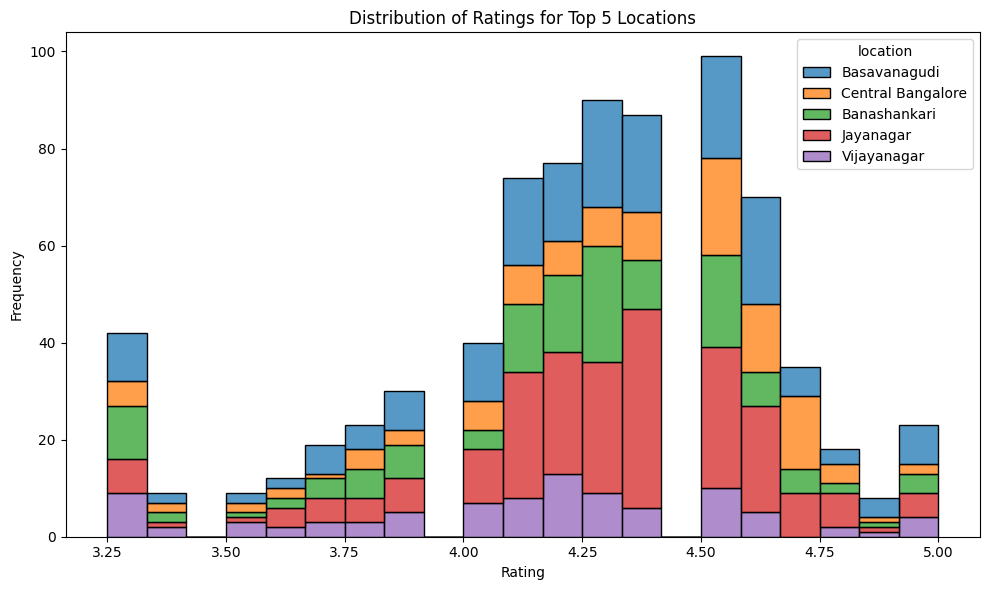

In [363]:
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6)) # Single plot
# Plot distribution of ratings for the top 5 locations
sns.histplot(data=df_top_5, x='rating', hue='location', multiple='stack', ax=ax)
ax.set_title('Distribution of Ratings for Top 5 Locations')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Key Observation:**

***Restaurant Distribution:***

Certain locations like Jayanagar and Basavanagudi have a high concentration of restaurants, indicating they are popular dining areas.

# The Average Rating by Location (top locations)

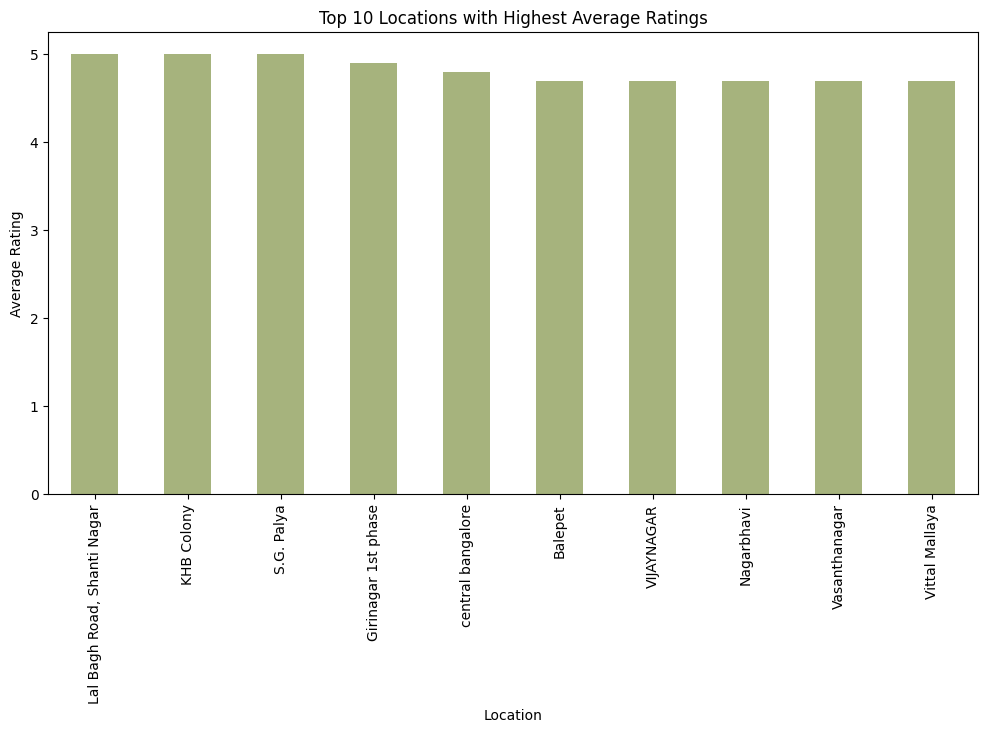

In [364]:
# Plot the average rating by location (top 10 locations)
plt.figure(figsize=(12, 6))
location_avg_rating.head(10).plot(kind='bar', color='#A6B37D')
plt.title('Top 10 Locations with Highest Average Ratings')
plt.xlabel('Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


**Key Observation:**

***Highest-Rated Locations:***

Locations such as KHB Colony and S.G. Palya have the highest average ratings, though they have only one or very few restaurants, which can skew the results.


# Cuisine Analysis:

In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore unique cuisines (split by comma and strip whitespace)
unique_cuisines = df_cleaned['cuisine'].str.split(',').explode().str.strip().unique()
print("Unique Cuisines:", unique_cuisines)


Unique Cuisines: ['Chinese' 'Asian' 'Tibetan' 'Desserts' 'Burgers' 'Salads' 'Snacks'
 'Beverages' 'Pizzas' 'Biryani' 'Andhra' 'South Indian' 'North Indian'
 'Ice Cream' 'Home Food' 'Indian' 'Healthy Food' 'Rajasthani'
 'Maharashtrian' 'Sweets' 'Kebabs' 'Tandoor' 'Continental' 'Italian'
 'Fast Food' 'Thalis' 'Pastas' 'American' 'Rolls & Wraps' 'Cafe' 'Bakery'
 'Chaat' 'Momos' 'Italian-American' 'Street Food' 'Keto' 'Punjabi'
 'Ice Cream Cakes' 'Mexican' 'Thai' 'Lucknowi' 'Hyderabadi' 'Waffle'
 'Mughlai' 'Juices' 'Kerala' 'French' 'Seafood' 'Grill' 'Coastal' 'Awadhi'
 'Arabian' 'briyani' 'Pan-Asian' 'Jain' 'Cakes and Pastries' 'Coffee'
 'Bubble Tea' 'Korean' 'Paan' 'Japanese' 'Turkish' 'Portuguese' 'Bengali'
 'Mediterranean' 'Lebanese' 'Barbecue' 'Oriental' 'Mangalorean'
 'Steakhouse' 'European' 'Sushi' 'rolls' 'Goan' 'Middle Eastern'
 'sandwich' 'Bihari' 'Gujarati' 'Vietnamese' 'Malaysian' 'Singaporean'
 'Burmese' 'Cakes & Pastries' 'Burger' 'Greek' 'Afghani' 'Chettinad'
 'fastfood' 'Ra

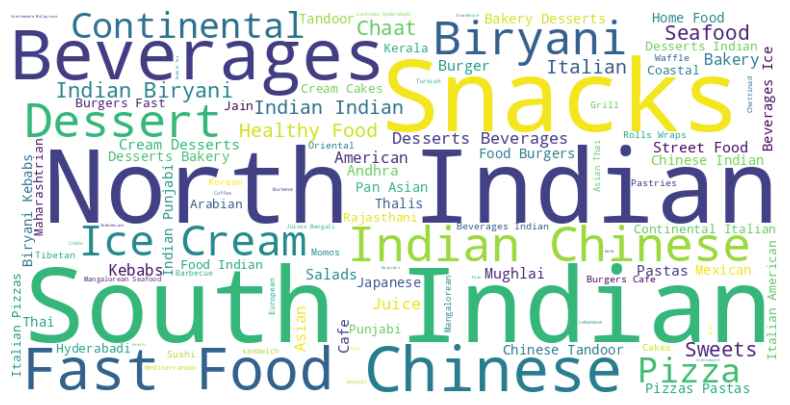

In [366]:
# Generate word cloud

from wordcloud import WordCloud, STOPWORDS
# Generate a word cloud for cuisines
cuisine_text = " ".join(df_cleaned['cuisine'].dropna())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(cuisine_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Determine the most popular cuisines

In [367]:

# We need to split the 'cuisine' column into individual cuisines first
cuisine_exploded = df_cleaned['cuisine'].str.split(',', expand=True).stack().str.strip()
cuisine_counts = cuisine_exploded.value_counts()

# Analyze the relationship between cuisine type and average rating
cuisine_ratings = df_cleaned.explode('cuisine')
cuisine_ratings['cuisine'] = cuisine_ratings['cuisine'].str.strip()
cuisine_avg_rating = cuisine_ratings.groupby('cuisine')['rating'].mean().sort_values(ascending=False)

# Identify which cuisines have the highest or lowest average ratings
highest_rated_cuisines = cuisine_avg_rating.head(10)
lowest_rated_cuisines = cuisine_avg_rating.tail(10)

# Print the results
print("Top 5 Most Popular Cuisines:")
print(cuisine_counts.head())



Top 5 Most Popular Cuisines:
Chinese         414
Beverages       357
Desserts        333
South Indian    322
North Indian    308
Name: count, dtype: int64


<ipython-input-368-871bc1156555>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.head(5).values, y=cuisine_counts.head(5).index, palette='Blues_d')


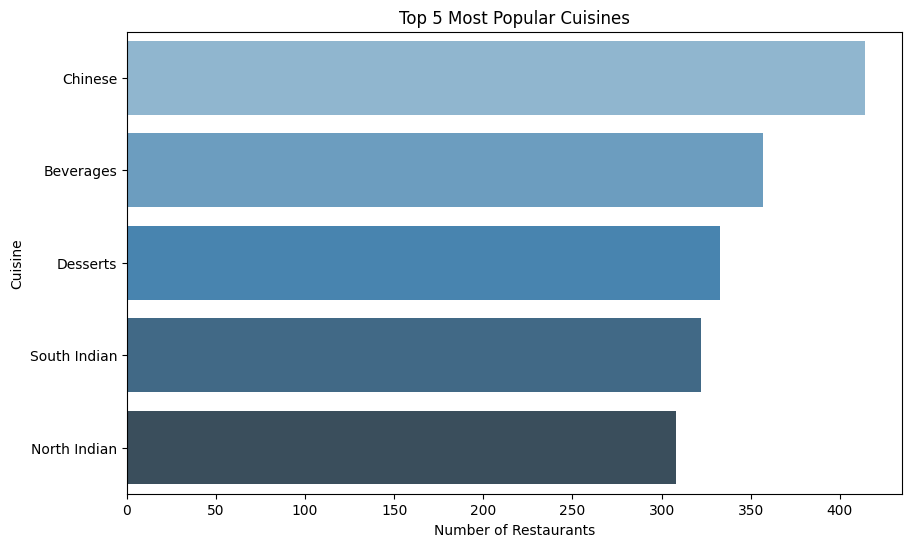

In [368]:
# Plotting the Top 5 Most Popular Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisine_counts.head(5).values, y=cuisine_counts.head(5).index, palette='Blues_d')
plt.title('Top 5 Most Popular Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()


**Key Observation:**

The plot shows the dominance of Chinese cuisine. Chinese food appears to be the most popular cuisine type, with significantly more restaurants offering it compared to any other cuisine in the top 5 list.

In [369]:
print("\nTop 10 Highest Rated Cuisines:")
print(highest_rated_cuisines)


Top 10 Highest Rated Cuisines:
cuisine
Ice Cream, Beverages, Fast Food                       5.0
Chinese, Burgers, Momos, Snacks, Fast Food, Pastas    5.0
South Indian, Indian, Home Food, Healthy Food         5.0
Ice Cream, Snacks, Beverages                          5.0
Desserts, Beverages, Ice Cream, Ice Cream Cakes       5.0
Chinese, Continental, Desserts, Oriental              5.0
Continental, Fast Food, Burgers                       5.0
Snacks, Cafe                                          5.0
Beverages, Pizzas, Burgers, Cafe                      5.0
North Indian, Chinese, Chaat, Snacks                  5.0
Name: rating, dtype: float64


<ipython-input-370-af2175dad453>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_rated_cuisines.values, y=highest_rated_cuisines.index, palette='Greens_d')


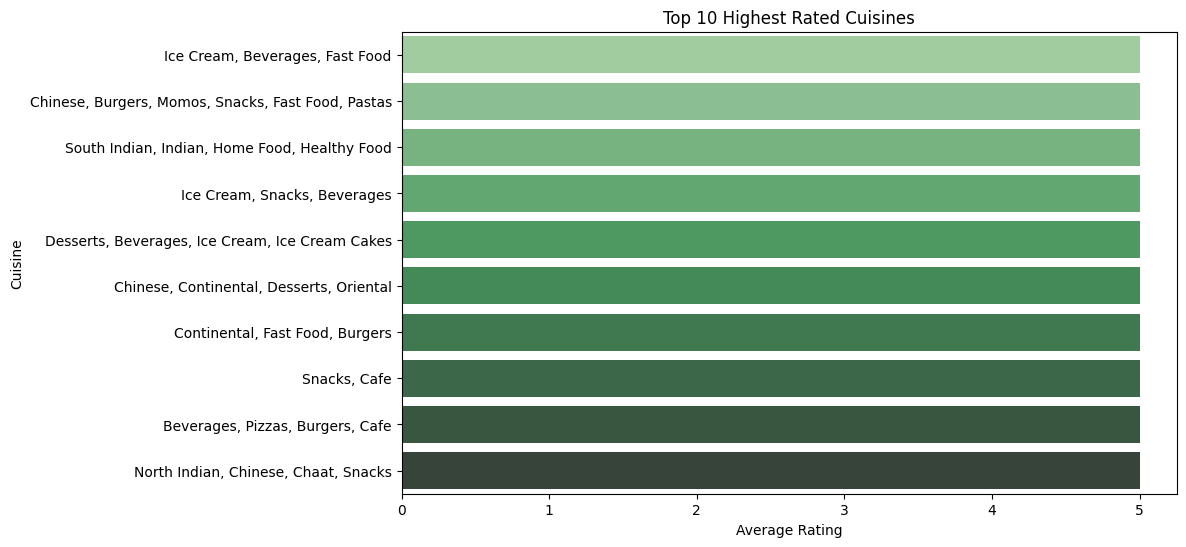

In [370]:
# Plotting the Top 10 Highest Rated Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=highest_rated_cuisines.values, y=highest_rated_cuisines.index, palette='Greens_d')
plt.title('Top 10 Highest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

In [371]:
print("\nTop 10 Lowest Rated Cuisines:")
print(lowest_rated_cuisines)


Top 10 Lowest Rated Cuisines:
cuisine
Chinese, Indian, Biryani, Snacks, Burgers                                                         3.25
Maharashtrian, Biryani, Indian                                                                    3.25
Chinese, Biryani, Kerala, Indian, Ice Cream, Home Food, Healthy Food, Fast Food, Burgers, Cafe    3.25
Street Food, Fast Food, Beverages                                                                 3.25
Chinese, Beverages, Fast Food, Burgers                                                            3.25
North Indian, Biryani, Chinese, Indian                                                            3.25
Fast Food, Burgers                                                                                3.25
North Indian, Thalis, Salads, Sweets                                                              3.25
Pizzas, Burgers, Fast Food                                                                        3.25
Snacks, Punjabi, North Indian     

<ipython-input-372-ab580b9ffc34>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_rated_cuisines.values, y=lowest_rated_cuisines.index, palette='Reds_d')


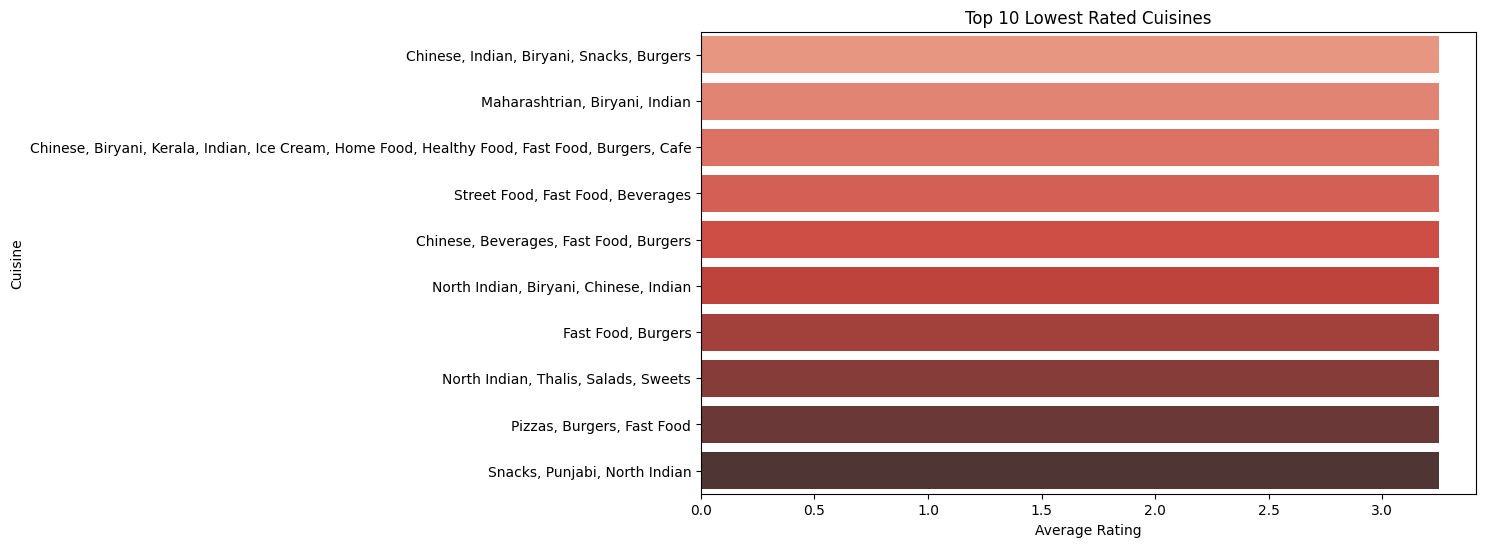

In [372]:
# Plotting the Top 10 Lowest Rated Cuisines
plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_rated_cuisines.values, y=lowest_rated_cuisines.index, palette='Reds_d')
plt.title('Top 10 Lowest Rated Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


In [373]:
# Group cuisines (tailored based on domain knowledge)
cuisine_group = {
    'Indian': ['North Indian', 'South Indian', 'Biryani', 'Thali', 'Andhra', 'Tandoor', 'Mughlai', 'Hyderabadi', 'Kebab', 'Chettinad'],
    'Chinese': ['Chinese', 'Indo Chinese', 'Szechuan', 'Cantonese'],
    'Italian': ['Italian', 'Pizza', 'Pasta', 'Risotto', 'Lasagna'],
    'Fast Food': ['Burger', 'American', 'Snacks', 'Sandwiches', 'Fries', 'Hot Dog'],
    'Desserts': ['Desserts', 'Bakery', 'Ice Cream', 'Confectionery', 'Pastry', 'Cupcakes'],
    'Middle Eastern': ['Middle Eastern', 'Lebanese', 'Turkish', 'Shawarma', 'Falafel'],
    'Mexican': ['Mexican', 'Tacos', 'Burritos', 'Quesadilla'],
    'Japanese': ['Japanese', 'Sushi', 'Ramen', 'Tempura'],
    'Thai': ['Thai', 'Pad Thai', 'Thai Curry'],
    'Continental': ['Continental', 'European', 'Steak', 'Grill'],
    'Mediterranean': ['Mediterranean', 'Greek', 'Spanish', 'Italian'],
    'Asian': ['Asian', 'Pan Asian', 'Vietnamese', 'Malaysian', 'Korean', 'Thai'],
    'Healthy': ['Healthy Food', 'Salads', 'Organic', 'Diet Food'],
    'Seafood': ['Seafood', 'Fish', 'Crab', 'Prawn', 'Sushi'],
    'Beverages': ['Beverages', 'Coffee', 'Tea', 'Juices', 'Smoothies', 'Shakes'],
    'Barbecue': ['Barbecue', 'BBQ', 'Grill'],
    'Indian Sweets': ['Indian Sweets', 'Mithai', 'Halwa', 'Rasgulla', 'Gulab Jamun'],
    'Pizza': ['Pizza', 'Italian Pizza', 'American Pizza', 'New York Pizza'],
    'Vegan': ['Vegan', 'Vegetarian', 'Plant-Based'],
    'Breakfast': ['Breakfast', 'Brunch', 'Morning Bites'],
    'South American': ['South American', 'Brazilian', 'Argentinian'],
    'Fusion': ['Fusion', 'Indo-Fusion', 'Asian Fusion'],
}


In [374]:
# Add a 'cuisine_group' column to the DataFrame
df_cleaned['cuisine_group'] = df_cleaned['cuisine'].apply(lambda x: next((group for group, cuisines in cuisine_group.items() if x in cuisines), None))

# Further analysis (example - average rating by cuisine group)
average_rating_by_cuisine = df_cleaned.groupby('cuisine_group')['rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Cuisine Group:\n", average_rating_by_cuisine)


Average Rating by Cuisine Group:
 cuisine_group
South American    5.000000
Asian             4.600000
Continental       4.550000
Seafood           4.500000
Desserts          4.355714
Beverages         4.336538
Chinese           4.316071
Indian            4.229204
Italian           4.050000
Fast Food         4.043333
Healthy           3.800000
Name: rating, dtype: float64


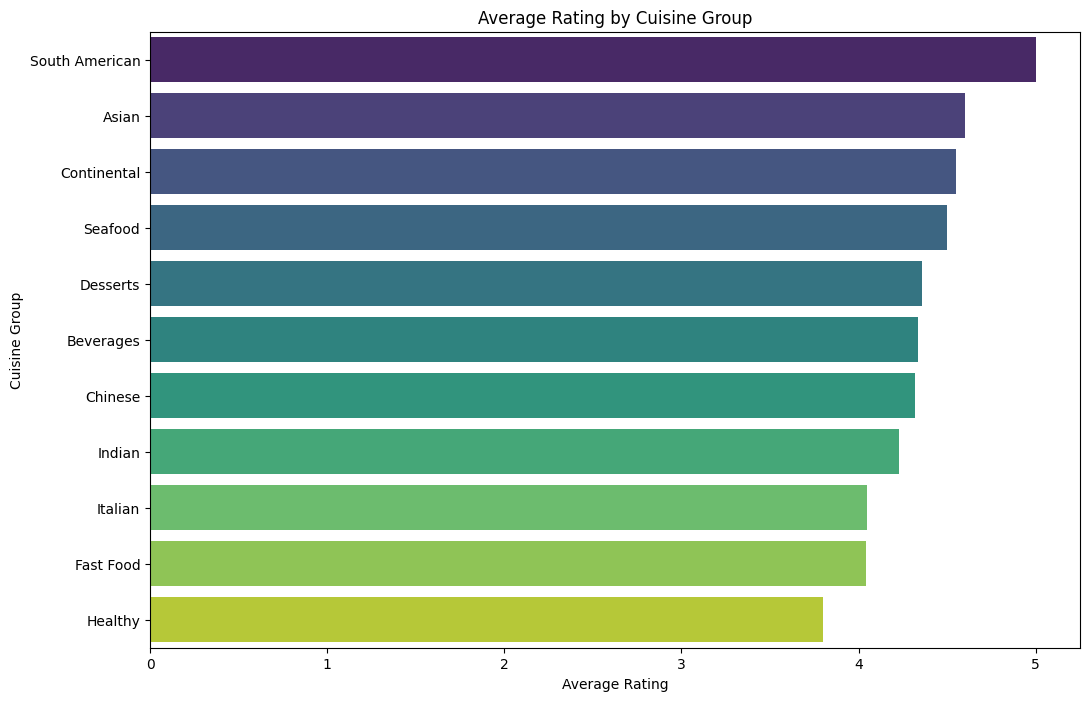

In [375]:
# Calculate average rating by cuisine group
average_rating_by_cuisine = df_cleaned.groupby('cuisine_group')['rating'].mean().sort_values(ascending=False)

# Plotting the average ratings
plt.figure(figsize=(12, 8))
sns.barplot(x=average_rating_by_cuisine.values, y=average_rating_by_cuisine.index, hue=average_rating_by_cuisine.index, palette='viridis', legend=False) # Set hue and disable legend
plt.title('Average Rating by Cuisine Group')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Group') # Add y-axis label
plt.show()

Observation:

High-Rated Cuisines:
- South American, Mexican,Healthy and Continental cuisines stand out with the highest average ratings,
  suggesting a premium dining experience and potential for higher customer satisfaction.

Competitive Landscape:
- Chinese and Indian cuisines, despite being popular, have average ratings slightly below
  the top contenders, indicating a more competitive market with varying restaurant quality.

Opportunity for Improvement:
- Barbecue food options, while gaining traction, have a relatively lower average rating,
  highlighting a potential area for improvement in terms of taste and customer experience.


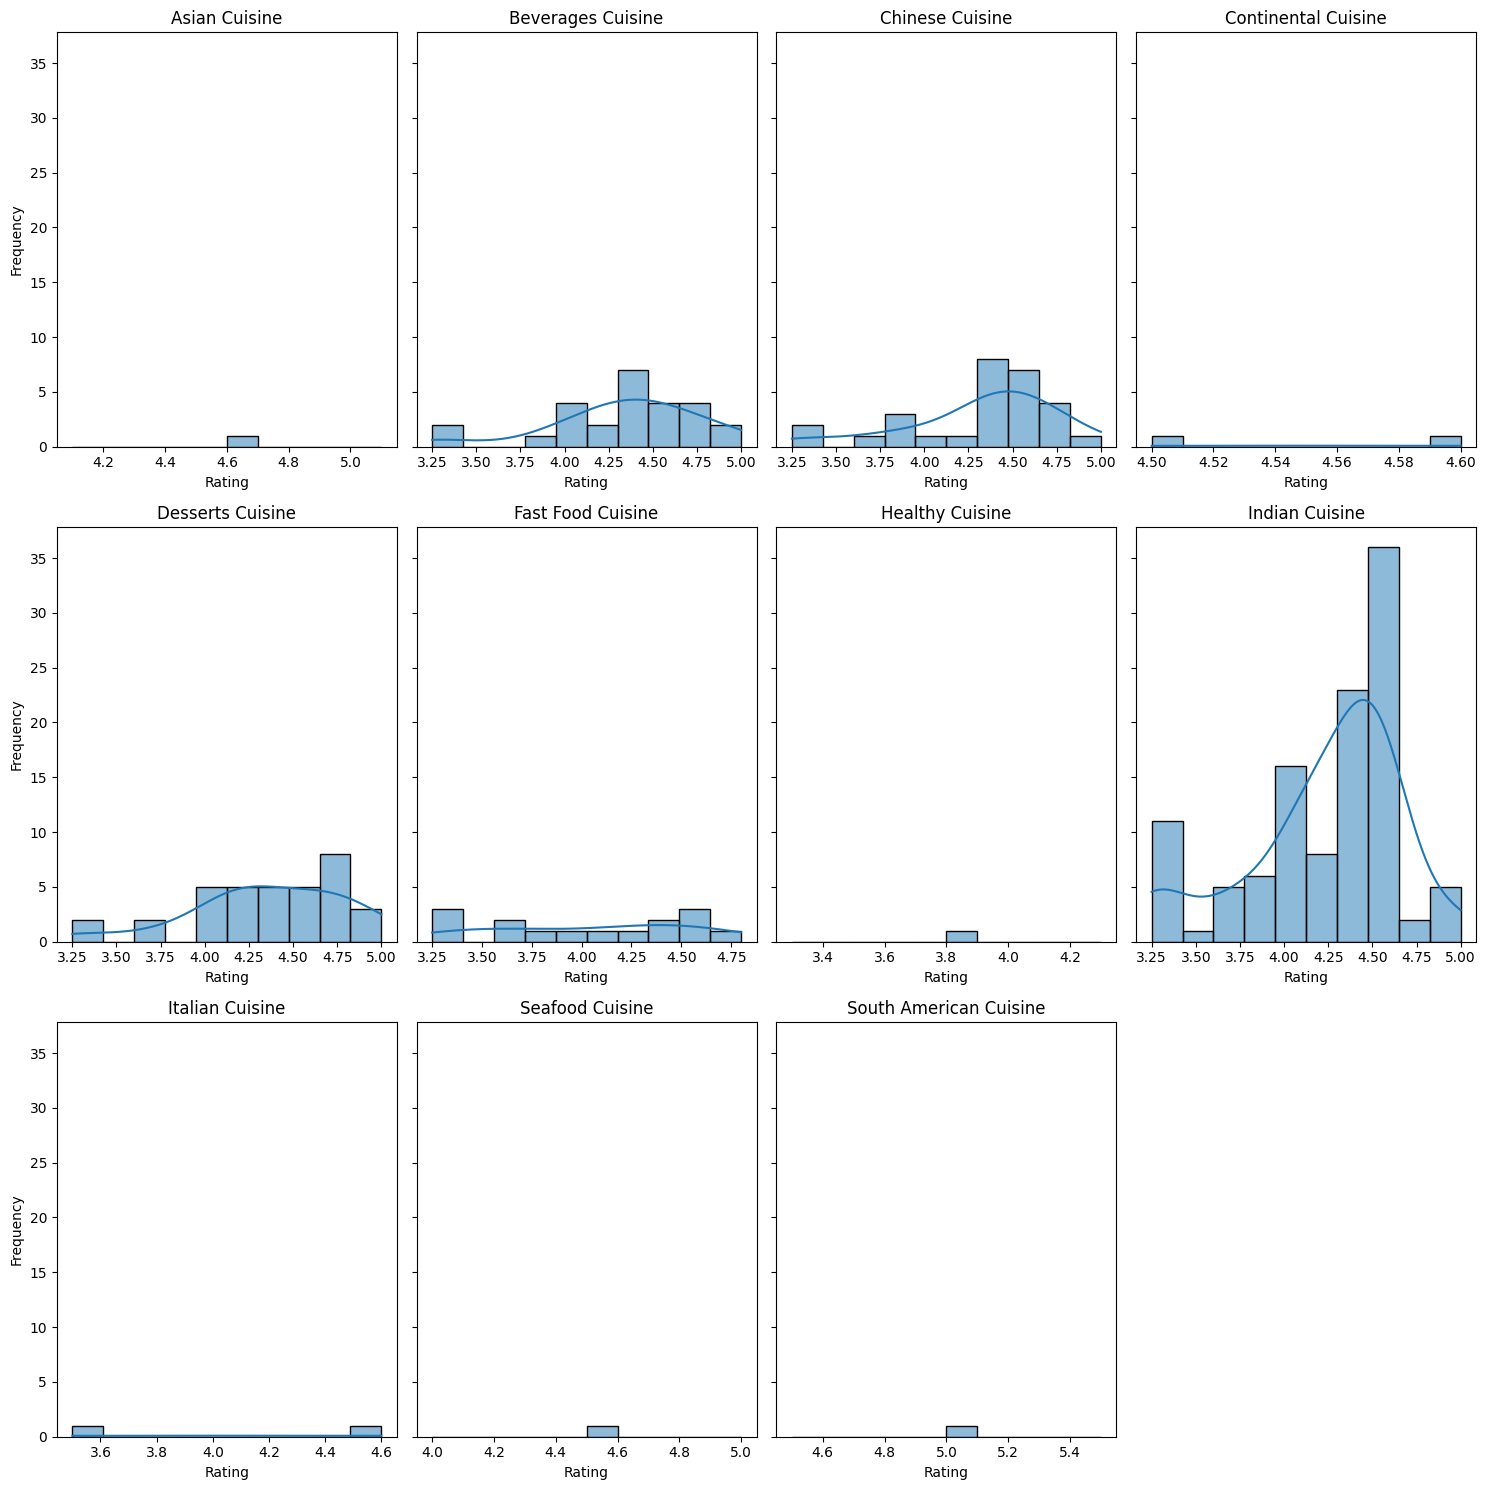

In [376]:
# Get unique cuisine groups
cuisine_groups = df_cleaned['cuisine_group'].unique()

# Calculate the number of rows needed
num_cuisines = len(cuisine_groups)
num_cols = 4
num_rows = (num_cuisines + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a figure with the appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), sharey=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through each cuisine group and plot
for i, (cuisine_group, data) in enumerate(df_cleaned.groupby('cuisine_group')):
    sns.histplot(data['rating'], bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'{cuisine_group} Cuisine')
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Cuisine Combinations based on the Orders:

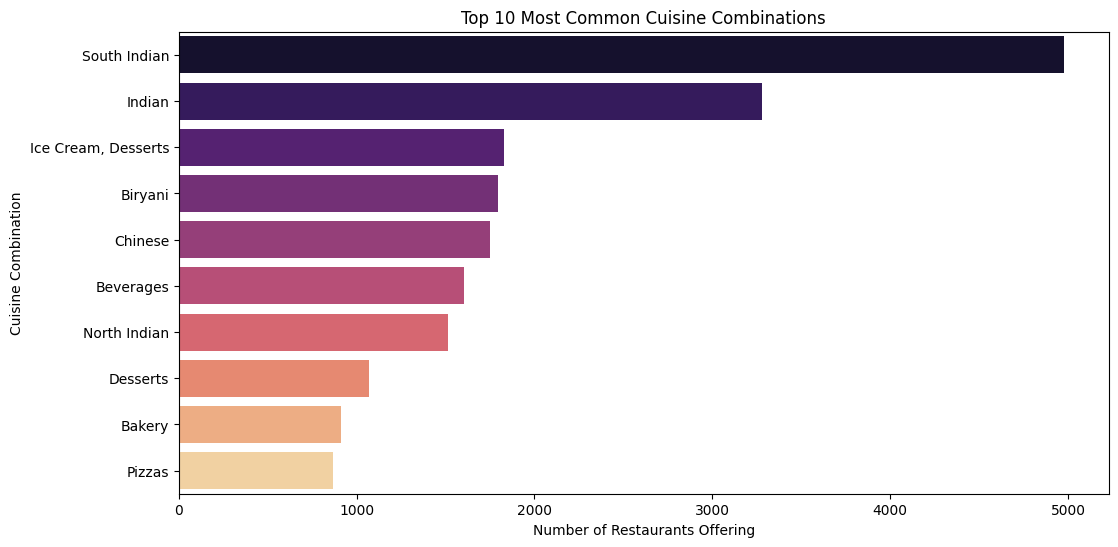

In [377]:
# Analyze the most common cuisine combinations
cuisine_combinations = df['cuisine'].value_counts().head(10)

# Plot the top 10 cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_combinations, y=cuisine_combinations.index, hue=cuisine_combinations.index, palette='magma', legend=False)
plt.title('Top 10 Most Common Cuisine Combinations')
plt.xlabel('Number of Restaurants Offering')
plt.ylabel('Cuisine Combination')
plt.show()

A notable observation from this plot is the clear dominance of **South Indian** cuisine. It stands out significantly as the most common cuisine type, offered by nearly twice as many restaurants as the next most popular category (generic "Indian" cuisine). This suggests a strong regional preference or cultural influence favoring South Indian food in the area represented by this data.

#**Key Insights from Swiggy Data Analysis:**

- ***High Average Ratings:*** Restaurants on Swiggy generally receive positive reviews, indicating good customer satisfaction.

- ***Popular Cuisines:*** Chinese and South Indian cuisines are dominant, reflecting local preferences.

- ***Cuisine and Rating:*** South American, Mexican, and Healthy cuisines stand out with higher average ratings.

- ***Location Matters:*** Certain locations have a higher concentration of restaurants and higher average ratings.

- ***Opportunity for Improvement:*** Barbecue cuisine shows potential for improvement in customer satisfaction.

#**FIVE ALGORITHMS IMPLEMENTED:**

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Select features and target variable
features = df_cleaned[['cuisine', 'location', 'delivery_time']]
target = df_cleaned['rating']
# Encode categorical variables
label_encoder = LabelEncoder()
features.loc[:, 'cuisine'] = label_encoder.fit_transform(features['cuisine'])
features.loc[:, 'location'] = label_encoder.fit_transform(features['location'])
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

1. **Simple Linear Regression:**

In [391]:
from sklearn.linear_model import LinearRegression

# Feature and target selection for Simple Linear Regression
X_simple = df_cleaned[['delivery_time']]
y = df_cleaned['rating']

# Split the data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.3, random_state=42)

# Initialize and train the model
simple_lr_model = LinearRegression()
simple_lr_model.fit(X_train_simple, y_train_simple)

# Make predictions
y_pred_simple_lr = simple_lr_model.predict(X_test_simple)

# Evaluate the model
mse_simple_lr = mean_squared_error(y_test_simple, y_pred_simple_lr)
r2_simple_lr = r2_score(y_test_simple, y_pred_simple_lr)

print(f'Simple Linear Regression MSE: {mse_simple_lr:.4f}')
print(f'Simple Linear Regression R2: {r2_simple_lr:.4f}')


Simple Linear Regression MSE: 0.1495
Simple Linear Regression R2: 0.0162


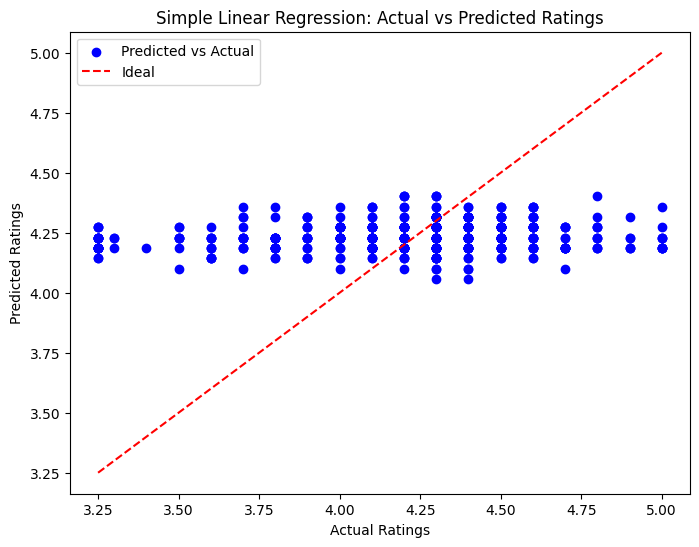

In [392]:
# Plot for Simple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test_simple, y_pred_simple_lr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_simple), max(y_test_simple)], [min(y_test_simple), max(y_test_simple)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Simple Linear Regression: Actual vs Predicted Ratings')
plt.legend()
plt.show()

This model has a very low R² value, close to 0, indicating that delivery_time alone is not a good predictor of rating. The MSE is relatively low, but the poor R² suggests that the model does not explain much of the variance in the ratings.

2. **Multiple Linear Regression:**

In [393]:
# Feature and target selection for Multiple Linear Regression
X = features  # Already defined earlier with encoded 'cuisine' and 'location'
y = df_cleaned['rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model
multiple_lr_model = LinearRegression()
multiple_lr_model.fit(X_train, y_train)

# Make predictions
y_pred_multiple_lr = multiple_lr_model.predict(X_test)

# Evaluate the model
mse_multiple_lr = mean_squared_error(y_test, y_pred_multiple_lr)
r2_multiple_lr = r2_score(y_test, y_pred_multiple_lr)

print(f'Multiple Linear Regression MSE: {mse_multiple_lr:.4f}')
print(f'Multiple Linear Regression R2: {r2_multiple_lr:.4f}')


Multiple Linear Regression MSE: 0.1493
Multiple Linear Regression R2: 0.0174


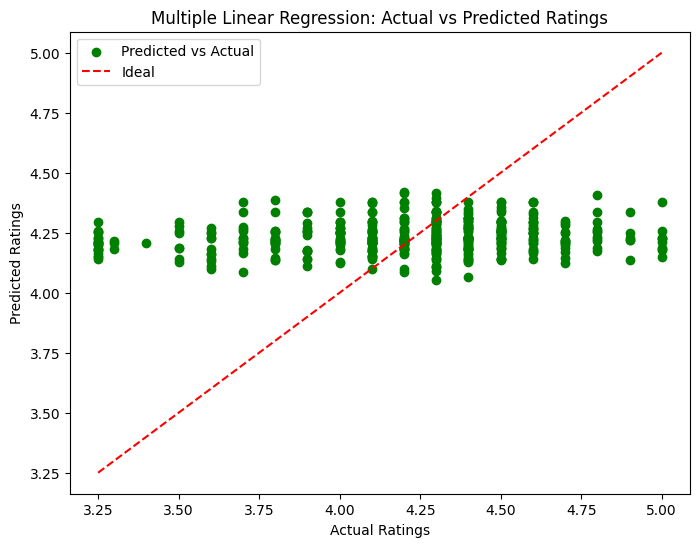

In [394]:
# Plot for Multiple Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple_lr, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multiple Linear Regression: Actual vs Predicted Ratings')
plt.legend()
plt.show()


The multiple linear regression model slightly improves on the simple linear regression model in terms of both MSE and R². However, the R² is still very low, indicating that even with additional features (cuisine, location, and delivery_time), the model is not capturing much of the variance in the ratings. This suggests that other factors not included in the model might be influencing the ratings.

3. **Logistic Regression:**

In [395]:
from sklearn.linear_model import LogisticRegression

# Convert target to binary classification
y_binary = (df_cleaned['rating'] >= 4).astype(int)

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_bin)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_logistic = accuracy_score(y_test_bin, y_pred_logistic)
precision_logistic = precision_score(y_test_bin, y_pred_logistic)
recall_logistic = recall_score(y_test_bin, y_pred_logistic)
f1_logistic = f1_score(y_test_bin, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic:.4f}')
print(f'Logistic Regression Precision: {precision_logistic:.4f}')
print(f'Logistic Regression Recall: {recall_logistic:.4f}')
print(f'Logistic Regression F1 Score: {f1_logistic:.4f}')


Logistic Regression Accuracy: 0.7911
Logistic Regression Precision: 0.7911
Logistic Regression Recall: 1.0000
Logistic Regression F1 Score: 0.8834


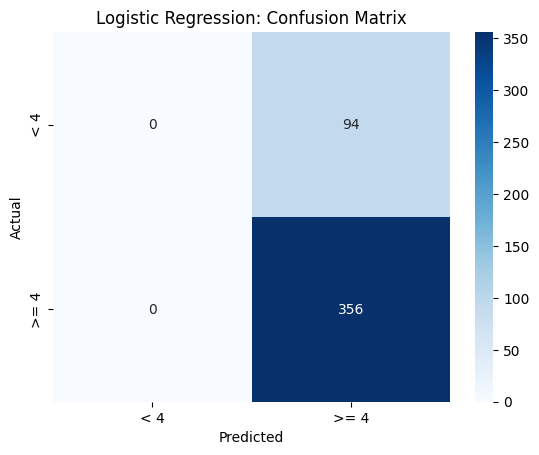

In [396]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test_bin, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['< 4', '>= 4'], yticklabels=['< 4', '>= 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()


Logistic regression performs well in classifying whether a rating is greater than or equal to 4. The high recall (1.0000) indicates that the model correctly identifies all high ratings, but the precision (0.7911) suggests that there are some false positives. The F1 score of 0.8834 indicates a good balance between precision and recall.

4. **Decision Tree Regressor:**

In [397]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regression MSE: {mse_dt:.4f}')
print(f'Decision Tree Regression R2: {r2_dt:.4f}')


Decision Tree Regression MSE: 0.3071
Decision Tree Regression R2: -1.0204


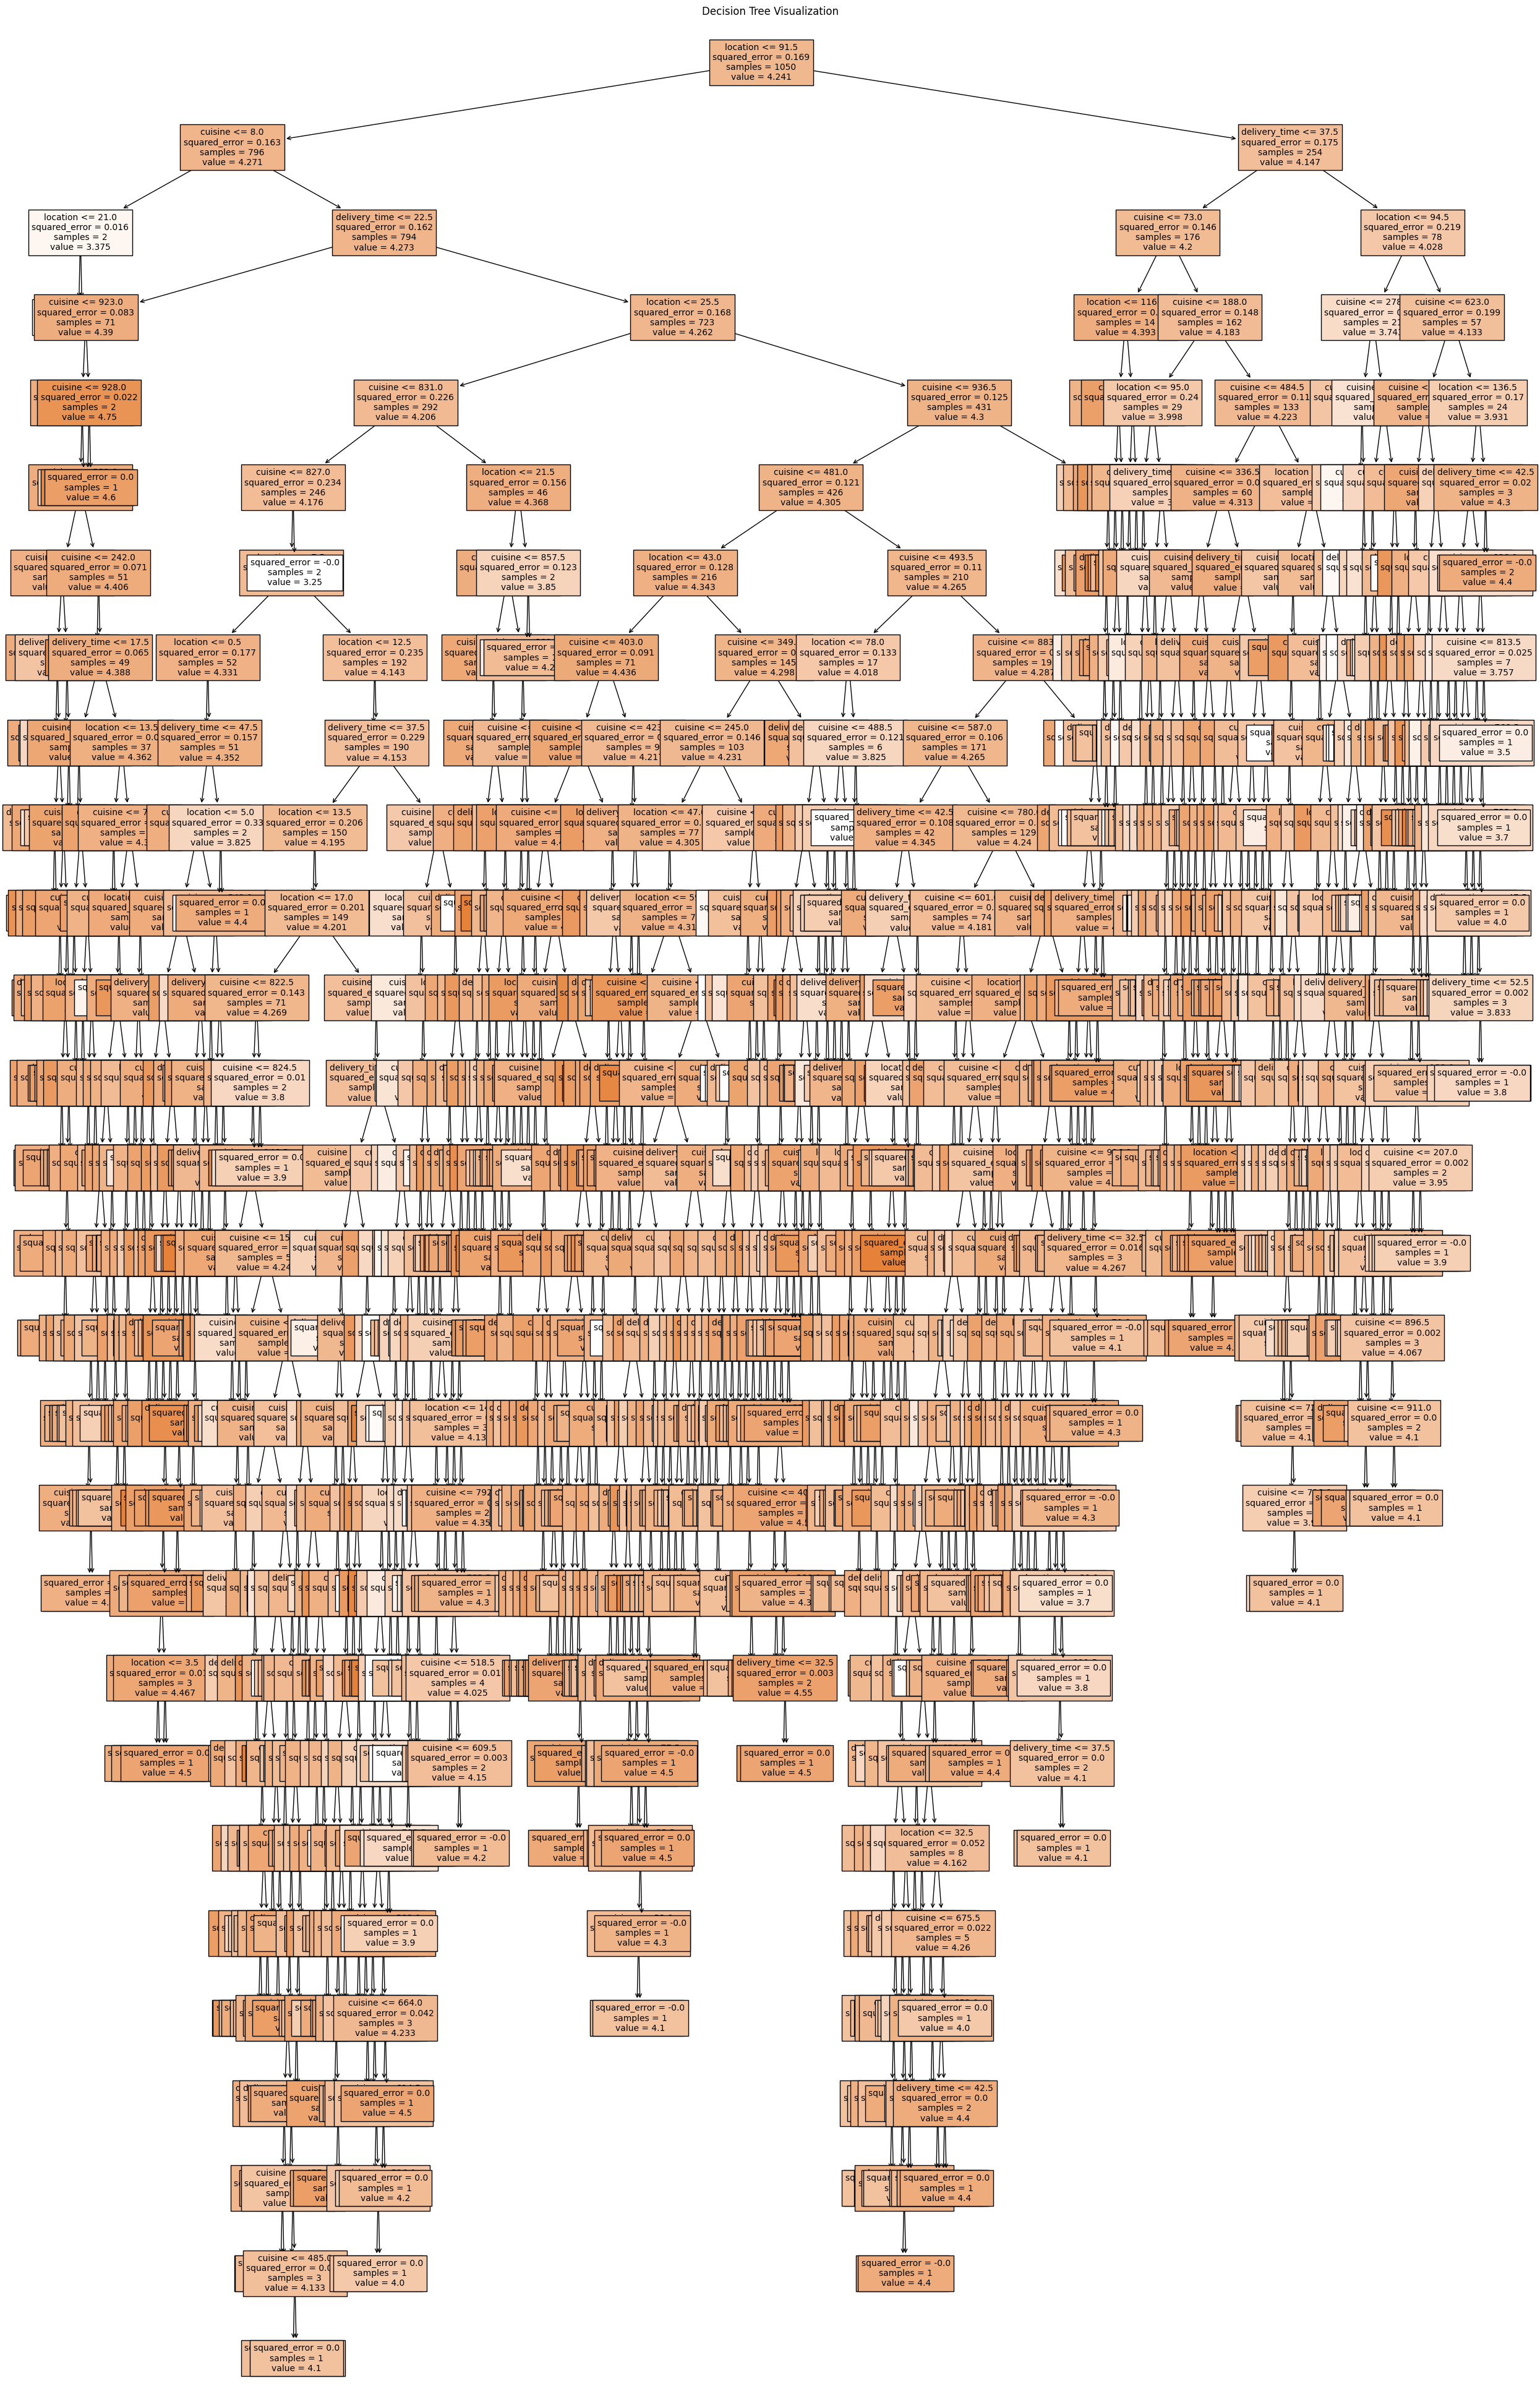

In [398]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(30, 50))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


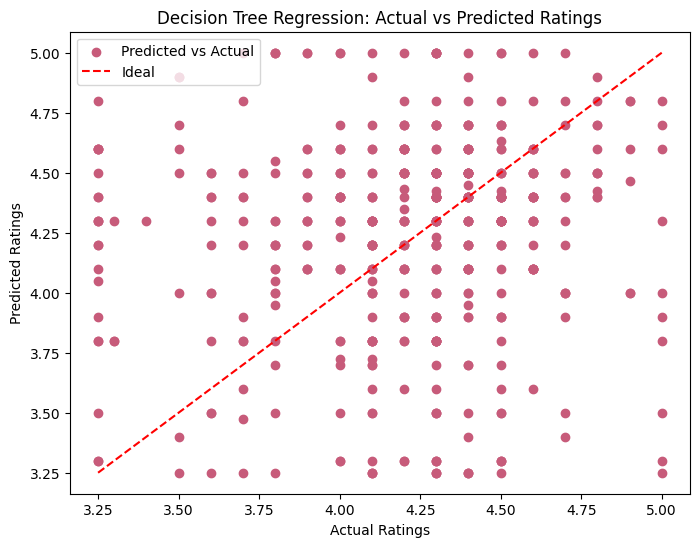

In [399]:
# Plot for Decision Tree Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='#C75B7A', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Decision Tree Regression: Actual vs Predicted Ratings')
plt.legend()
plt.show()


The decision tree model performs poorly, with a high MSE and a negative R² value. A negative R² suggests that the model is performing worse than a simple mean-based model (i.e., predicting the mean of the ratings for all predictions). This could indicate overfitting to the training data or that the decision tree is not a good fit for this dataset.

5. **Random Forest Regression:**

In [400]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regression MSE: {mse_rf:.4f}')
print(f'Random Forest Regression R2: {r2_rf:.4f}')


Random Forest Regression MSE: 0.1660
Random Forest Regression R2: -0.0923


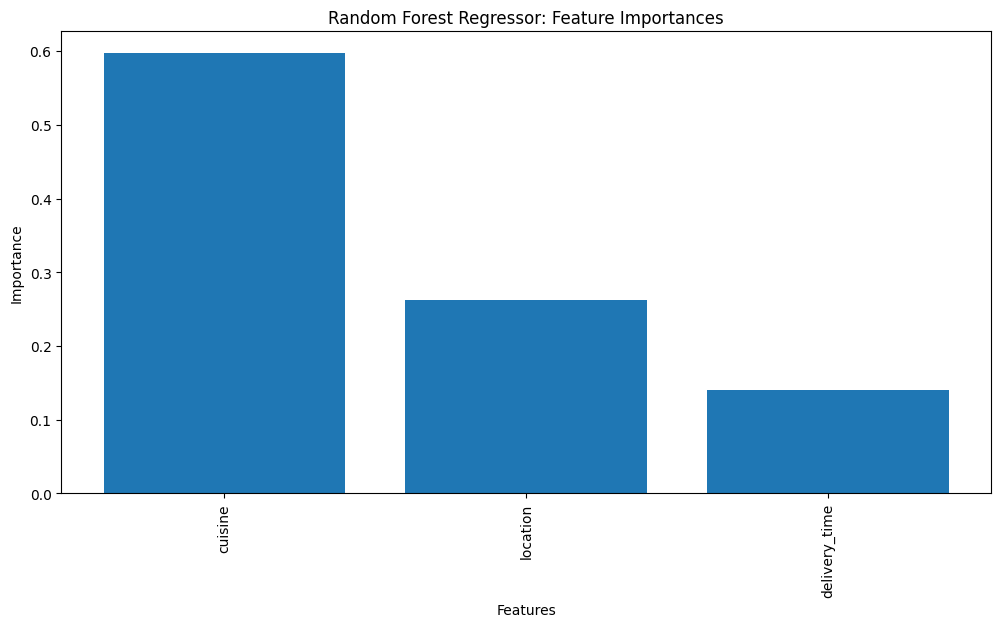

In [401]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Regressor: Feature Importances')
plt.show()


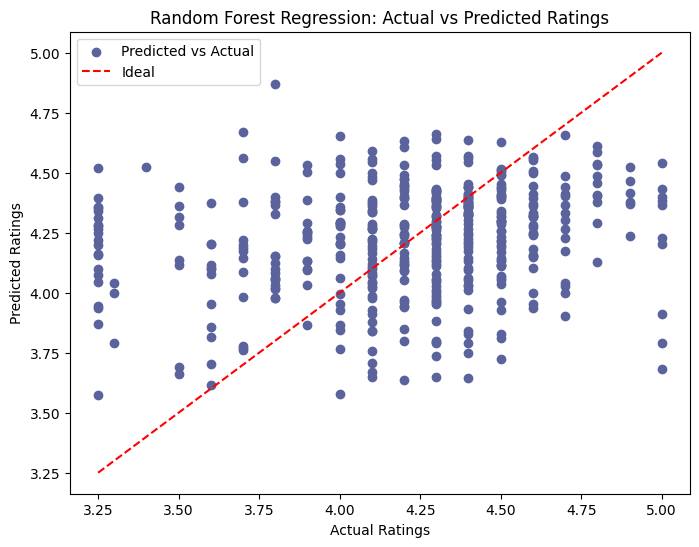

In [402]:
# Plot for Random Forest Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='#5A639C', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest Regression: Actual vs Predicted Ratings')
plt.legend()
plt.show()


The random forest model also performs poorly, with a negative R² value, though it is less negative than the decision tree. The higher MSE compared to the linear models suggests that the ensemble approach of random forests did not generalize well for this particular dataset.

In [403]:
# Display all results
print("\nModel Performance Summary:")
print(f"Simple Linear Regression: MSE = {mse_simple_lr:.4f}, R2 = {r2_simple_lr:.4f}")
print(f"Multiple Linear Regression: MSE = {mse_multiple_lr:.4f}, R2 = {r2_multiple_lr:.4f}")
print(f"Logistic Regression: Accuracy = {accuracy_logistic:.4f}, Precision = {precision_logistic:.4f}, Recall = {recall_logistic:.4f}, F1 = {f1_logistic:.4f}")
print(f"Decision Tree Regression: MSE = {mse_dt:.4f}, R2 = {r2_dt:.4f}")
print(f"Random Forest Regression: MSE = {mse_rf:.4f}, R2 = {r2_rf:.4f}")



Model Performance Summary:
Simple Linear Regression: MSE = 0.1495, R2 = 0.0162
Multiple Linear Regression: MSE = 0.1493, R2 = 0.0174
Logistic Regression: Accuracy = 0.7911, Precision = 0.7911, Recall = 1.0000, F1 = 0.8834
Decision Tree Regression: MSE = 0.3071, R2 = -1.0204
Random Forest Regression: MSE = 0.1660, R2 = -0.0923


#COMPARISIONS

In [406]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression', 'Logistic Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'MSE': [mse_simple_lr, mse_multiple_lr, np.nan, mse_dt, mse_rf],
    'R2': [r2_simple_lr, r2_multiple_lr, np.nan, r2_dt, r2_rf],
    'Accuracy': [np.nan, np.nan, accuracy_logistic, np.nan, np.nan],
    'Precision': [np.nan, np.nan, precision_logistic, np.nan, np.nan],
    'Recall': [np.nan, np.nan, recall_logistic, np.nan, np.nan],
    'F1 Score': [np.nan, np.nan, f1_logistic, np.nan, np.nan]
})



<ipython-input-405-27f4cfda0361>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df[results_df['Model'] != 'Logistic Regression'], palette='viridis')


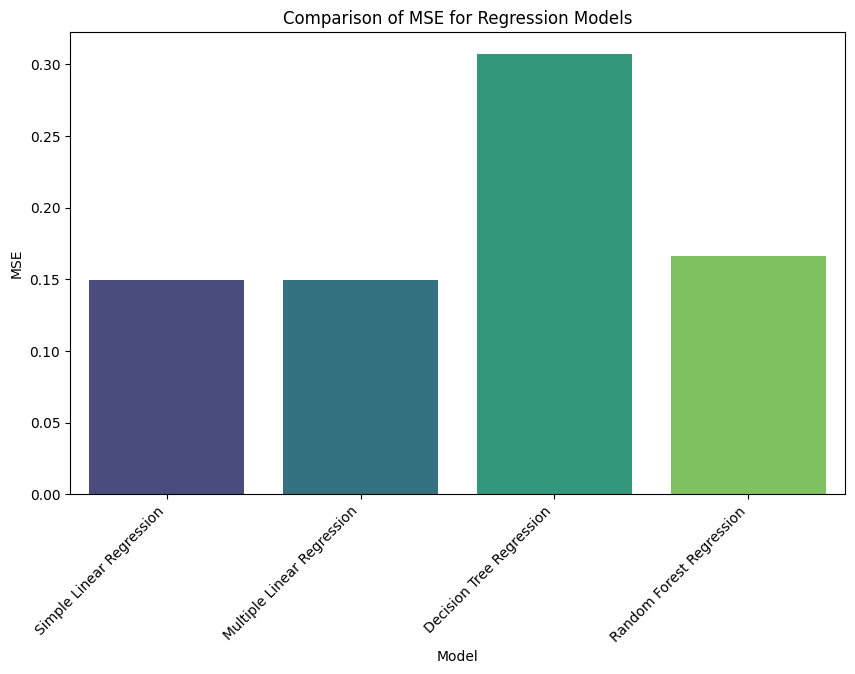

In [405]:
# Plotting MSE for Regression Models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df[results_df['Model'] != 'Logistic Regression'], palette='viridis')
plt.title('Comparison of MSE for Regression Models')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-407-a389ecc943cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=results_df[results_df['Model'] != 'Logistic Regression'], palette='magma')


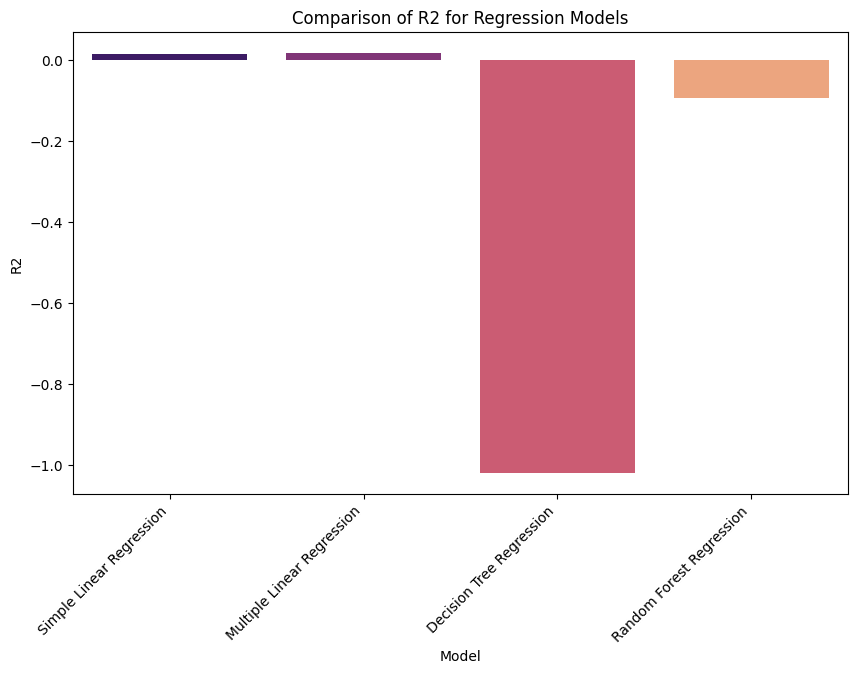

In [407]:
# Plotting R2 for Regression Models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df[results_df['Model'] != 'Logistic Regression'], palette='magma')
plt.title('Comparison of R2 for Regression Models')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-408-d0a7fa2ed991>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='coolwarm')


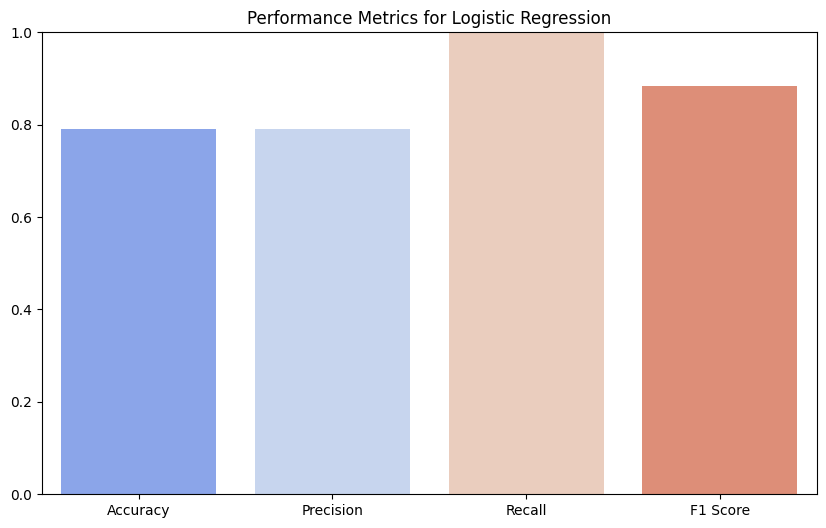

In [408]:
# Plotting Metrics for Logistic Regression
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = results_df.loc[results_df['Model'] == 'Logistic Regression', metrics].values.flatten()
sns.barplot(x=metrics, y=values, palette='coolwarm')
plt.title('Performance Metrics for Logistic Regression')
plt.ylim(0, 1)  # Set y-axis limit for better visualization of metrics
plt.show()


# Model Performance Interpretation:
- Simple and Multiple Linear Regression performed poorly with very low R2 scores, indicating they are not suitable for predicting ratings based on the chosen features.
- Decision Tree and Random Forest Regression also performed poorly with negative R2 scores, suggesting overfitting or that these models are not a good fit for this data.
- Logistic Regression, used for classifying ratings as high or low, showed good performance with high recall and reasonable precision. It is the most promising model among the ones tested.

Overall, the chosen features (cuisine, location, delivery time) seem to have limited predictive power for rating. Further feature engineering or exploring different models might be necessary to improve prediction accuracy.

#**Key Insights:**

- ***Linear Models (Simple and Multiple):*** The linear models, while having low MSE, struggle to capture the variance in ratings (as indicated by low R² values). This suggests that the relationship between the selected features and the target (rating) is not well explained by linear models, indicating that the problem might be more complex or that important predictive features are missing.

- ***Logistic Regression:*** This model performs relatively well in classifying high ratings, suggesting that it can be effective for binary classification problems. However, its performance might drop if more classes or a more nuanced rating scale were used.

- ***Tree-Based Models (Decision Tree and Random Forest):*** Both models perform poorly, especially the decision tree model, which is likely overfitting or not capturing the underlying pattern of the data well. The random forest, while typically robust, also struggles with this dataset, suggesting that the selected features are not providing enough useful information for these models.



#**Conclusion:**

- The low performance across models, especially the R² values for regression models, suggests that the selected features (cuisine, location, and delivery_time) are not sufficient predictors of restaurant ratings. There may be other influential factors not captured in the dataset, such as service quality, price, or customer satisfaction, that could better explain the variation in ratings.

- For classification tasks, logistic regression shows promise in predicting whether a rating is above a certain threshold, but further exploration with more sophisticated models or feature engineering may be necessary to improve prediction accuracy.

- Recommendation: Gathering additional data or applying advanced techniques like feature engineering or using more complex models (e.g., neural networks) can improve predictive performance. Further exploration into other features or data sources that capture customer experience or restaurant characteristics might provide better results.